<a href="https://colab.research.google.com/github/kobi-2/IUT-Lab-ML/blob/master/CNN_Custom_Layers_Lab_(Starter_Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
!git clone https://github.com/redwankarimsony/CNN-Explainer-for-Beginners
%mv CNN-Explainer-for-Beginners Custom_Layer_Lab
%cd Custom_Layer_Lab

Cloning into 'CNN-Explainer-for-Beginners'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 4), reused 19 (delta 1), pack-reused 0
Unpacking objects: 100% (31/31), done.
/content/Custom_Layer_Lab/Custom_Layer_Lab/Custom_Layer_Lab/Custom_Layer_Lab/Custom_Layer_Lab/Custom_Layer_Lab


In [232]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def load_image_as_grayscale(path):
    img = Image.open(path) #read the image
#     img = img.resize((32,32)) #resize the image
    img = np.array(img) #convert image to numpy array
    return rgb2gray(img) # convert RGB to grayscale and return

## Pre-process Image
In order to get the best results with a 2D convolution, it is generally recommended that you process the image in grayscale. This is what is done here in the function `load_image_as_grayscale()` 

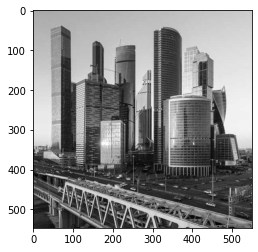

In [233]:
img = load_image_as_grayscale('./data/city1.jpg')
plt.imshow(img, cmap='gray') # convert the RGB to GRAY

In [234]:
#kernel for vertical lines
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 2D Convolution
To start the 2D Convolution method, we will have the following method header:<br>
                  ```
                  def convolve2D(image, kernel, padding=0, strides=1):``` <br>
Such that the image and kernel are specified by the user and the default padding around the image is 0 and default stride is 1.

The next thing that we must do is apply cross correlation to our kernel and this can be done using NumPy very easily through just flipping the matrix horizontally then vertically. This looks like:
                        <br>`kernel = np.flipud(np.fliplr(kernel))`<br>
We then need to compute the matrix size of our outputted image. This can very simply be done through the formula:
![](https://github.com/redwankarimsony/CNN-Explainer-for-Beginners/blob/main/dim.png?raw=1)

This must be implemented in each dimension (x, y). To start, we must gather the x and y size of the image and kernel. This can be done through:
```
xKernShape = kernel.shape[0] 
yKernShape = kernel.shape[1] 
xImgShape = image.shape[0] 
yImgShape = image.shape[0]
```



# Functions for 2D Convolution 

In [235]:
def custom_Convolve2D(image, kernel, padding=0, strides=1):
    
    # Cross Correlation
    # kernel = np.flipud(np.fliplr(kernel))
    
    ## assuming kernel is square matrix??
    
    if padding == 0:
      padding_ud = 0
      padding_lr = 0
    else:
      padding_ud = kernel.shape[0]-1 // 2
      padding_lr = kernel.shape[1]-1 // 2 

    # defining output
    output_size_row = int((image.shape[0] + 2*padding_ud - kernel.shape[0]) / strides) + 1   #shape[0] == rows
    output_size_col = int((image.shape[1] + 2*padding_lr - kernel.shape[1]) / strides) + 1   #shape[1] == cols
    output = np.zeros((output_size_row, output_size_col))

    # padding around the image
    image = np.vstack([np.zeros((padding_ud, image.shape[1])), image, np.zeros((padding_ud, image.shape[1]))])  # padding up and down
    image = np.hstack([np.zeros((image.shape[0], padding_lr)), image, np.zeros((image.shape[0], padding_lr))])  # padding left and right


    # Convolution
    positions_row = np.arange(0, image.shape[0]-kernel.shape[0]+1, step = strides)
    positions_col = np.arange(0, image.shape[1]-kernel.shape[1]+1, step = strides)

    for i in positions_row:
      for j in positions_col:
        # print(i,j)
        output[i//strides , j//strides] = np.sum(image[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)

    return output

In [236]:
def custom_MaxPooling(x, pool_shape=(2,2), stride=2):
  output_size_row = int(x.shape[0]-pool_shape[0]/stride)+1
  output_size_col = int(x.shape[1]-pool_shape[1]/stride)+1

  output = np.zeros((output_size_row, output_size_col))

  position_row = np.arange(0,x.shape[0]-pool_shape[0]+1, stride)
  position_col = np.arange(0,x.shape[1]-pool_shape[1]+1, stride)

  for i in position_row:
    for j in position_col:
      output[i//stride, j//stride] = np.max(x[i:i+pool_shape[0], j:j+pool_shape[1]])
  
  return output

In [237]:
def custom_Flatten(x):
  return np.reshape(x, (x.shape[0]*x.shape[1],1))

In [238]:
def custom_Dense(x, weight_size=10):
  weights = np.random.uniform(-0.0001, 0.0001, size=(weight_size, x.shape[0]))
  return np.dot(weights,x)

In [239]:
def custom_Softmax(x):
  x_exp = np.exp(x)
  exp_sum = np.sum(x_exp)
  return x_exp/exp_sum

# Testing the Implementation:

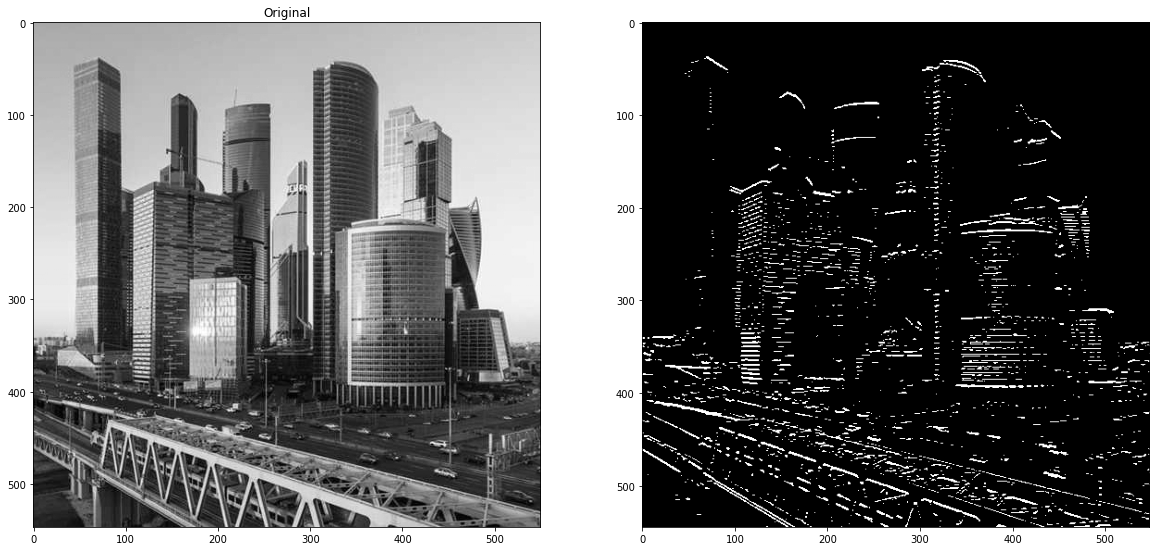

In [240]:
img = load_image_as_grayscale('./data/city1.jpg')
output = custom_Convolve2D(image=img, kernel= kernel.T)
result = (output-output.min())/(output.max() - output.min())

f, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title('Original')

axarr[1].imshow((result>0.6)*1., cmap = 'gray')

# What To Do:
Implement the following in the following fashion. Add custom weight dummy weights in the `Custom_Dense()` layer to a valid 10 class output in the last softrax layers. 
1. `Custom_Convolve2D()`
2. `Custom_MaxPoolling()`
3. `Custom_Flatten()`
4. `Custom_Dense()`
4. `Custom_Softmax()`

Make sure that, the follwong segment of code works. 

In [241]:
x = custom_Convolve2D(img, kernel)
x = custom_MaxPooling(x)
x = custom_Flatten(x)
x = custom_Dense(x, 10)
output = custom_Softmax(x)
output

array([[0.07201444],
       [0.22156397],
       [0.07717657],
       [0.05138514],
       [0.12083444],
       [0.00332299],
       [0.01393131],
       [0.0565341 ],
       [0.02841633],
       [0.35482071]])